In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib as plot
%matplotlib inline

In [2]:
# data = pd.read_csv('enron_spam_data.csv')[['Message', 'Spam/Ham']].dropna().head(10)
data = pd.read_csv('enron_spam_data.csv')[['Message', 'Spam/Ham']].dropna()

In [3]:
np_arr = data.to_numpy()

In [4]:
mails = pd.DataFrame(np_arr, columns=['message', 'label'])

In [5]:
mails.head()

,message,label
0,"gary , production from the high island larger ...",ham
1,- calpine daily gas nomination 1 . doc,ham
2,fyi - see note below - already done .\nstella\...,ham
3,fyi .\n- - - - - - - - - - - - - - - - - - - -...,ham
4,"jackie ,\nsince the inlet to 3 river plant is ...",ham


In [6]:
# Function to remove punctuations
import string

def remove_punc(text):
     return "".join([char for char in text if char not in string.punctuation])

mails["message"] = mails["message"].apply(lambda x: remove_punc(x))

In [7]:
mails.head(10)

,message,label
0,gary production from the high island larger b...,ham
1,calpine daily gas nomination 1 doc,ham
2,fyi see note below already done \nstella\n ...,ham
3,fyi \n forwarded by lauri...,ham
4,jackie \nsince the inlet to 3 river plant is s...,ham
5,george \ni need the following done \njan 13\nz...,ham
6,fyi\n forwarded by gary l...,ham
7,there are two fields of gas that i am having d...,ham
8,thanks so much for the memo i would like to r...,ham
9,the purpose of the email is to recap the kicko...,ham


In [8]:
# function to remove \n
def remove_newline(text):
    return ''.join(text.splitlines())

mails["message"] = mails["message"].apply(lambda x: remove_newline(x))

In [9]:
mails.head(10)

,message,label
0,gary production from the high island larger b...,ham
1,calpine daily gas nomination 1 doc,ham
2,fyi see note below already done stella ...,ham
3,fyi forwarded by lauri a...,ham
4,jackie since the inlet to 3 river plant is shu...,ham
5,george i need the following done jan 13zero ou...,ham
6,fyi forwarded by gary l p...,ham
7,there are two fields of gas that i am having d...,ham
8,thanks so much for the memo i would like to r...,ham
9,the purpose of the email is to recap the kicko...,ham


In [10]:
# tokenization
import re

def text_tokenize(text):
    return re.split('\W+', text)

mails['text_tokenized'] = mails['message'].apply(lambda x: text_tokenize(x))

In [11]:
mails.head(10)

,message,label,text_tokenized
0,gary production from the high island larger b...,ham,"[gary, production, from, the, high, island, la..."
1,calpine daily gas nomination 1 doc,ham,"[, calpine, daily, gas, nomination, 1, doc]"
2,fyi see note below already done stella ...,ham,"[fyi, see, note, below, already, done, stella,..."
3,fyi forwarded by lauri a...,ham,"[fyi, forwarded, by, lauri, a, allen, hou, ect..."
4,jackie since the inlet to 3 river plant is shu...,ham,"[jackie, since, the, inlet, to, 3, river, plan..."
5,george i need the following done jan 13zero ou...,ham,"[george, i, need, the, following, done, jan, 1..."
6,fyi forwarded by gary l p...,ham,"[fyi, forwarded, by, gary, l, payne, hou, ect,..."
7,there are two fields of gas that i am having d...,ham,"[there, are, two, fields, of, gas, that, i, am..."
8,thanks so much for the memo i would like to r...,ham,"[thanks, so, much, for, the, memo, i, would, l..."
9,the purpose of the email is to recap the kicko...,ham,"[the, purpose, of, the, email, is, to, recap, ..."


In [12]:
# https://stackabuse.com/removing-stop-words-from-strings-in-python/
# stop words
my_stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

In [13]:
# remove stop words
def remove_stopwords(token):
    return [word for word in token if word not in my_stopwords]

In [14]:
mails["none_stopwords"] = mails['text_tokenized'].apply(lambda x: remove_stopwords(x))

In [15]:
mails.head(10)

,message,label,text_tokenized,none_stopwords
0,gary production from the high island larger b...,ham,"[gary, production, from, the, high, island, la...","[gary, production, high, island, larger, block..."
1,calpine daily gas nomination 1 doc,ham,"[, calpine, daily, gas, nomination, 1, doc]","[, calpine, daily, gas, nomination, 1, doc]"
2,fyi see note below already done stella ...,ham,"[fyi, see, note, below, already, done, stella,...","[fyi, see, note, already, done, stella, forwar..."
3,fyi forwarded by lauri a...,ham,"[fyi, forwarded, by, lauri, a, allen, hou, ect...","[fyi, forwarded, lauri, allen, hou, ect, 12, 1..."
4,jackie since the inlet to 3 river plant is shu...,ham,"[jackie, since, the, inlet, to, 3, river, plan...","[jackie, since, inlet, 3, river, plant, shut, ..."
5,george i need the following done jan 13zero ou...,ham,"[george, i, need, the, following, done, jan, 1...","[george, need, following, done, jan, 13zero, 0..."
6,fyi forwarded by gary l p...,ham,"[fyi, forwarded, by, gary, l, payne, hou, ect,...","[fyi, forwarded, gary, l, payne, hou, ect, 12,..."
7,there are two fields of gas that i am having d...,ham,"[there, are, two, fields, of, gas, that, i, am...","[two, fields, gas, difficulty, unifysystem, 1,..."
8,thanks so much for the memo i would like to r...,ham,"[thanks, so, much, for, the, memo, i, would, l...","[thanks, much, memo, would, like, reiterate, s..."
9,the purpose of the email is to recap the kicko...,ham,"[the, purpose, of, the, email, is, to, recap, ...","[purpose, email, recap, kickoff, meeting, held..."


In [16]:
# remove stopwords with nltk library
# ==================================
# import nltk
# stopwords = nltk.corpus.stopwords.words("english")

# def remove_stopwords(token):
#     text = [word for word in token if word not in stopwords]
#     return text

# mails['none_stopwords'] = mails['text_tokenized'].apply(lambda x: remove_stopwords(x))
# data.head()

In [17]:
# Stemming and Lemmatization
# https://www.turing.com/kb/stemming-vs-lemmatization-in-python

import nltk

s = nltk.PorterStemmer()
def stemming(token):
    return [s.stem(word) for word in token]

l = nltk.stem.WordNetLemmatizer()

def lemmatizer(token):
    return [l.lemmatize(word) for word in token]

mails["stemmed_tokens"] = mails['none_stopwords'].apply(lambda x: stemming(x))
mails["lemmatized_tokens"] = mails["stemmed_tokens"].apply(lambda x: lemmatizer(x))

In [18]:
mails.head(10)

,message,label,text_tokenized,none_stopwords,stemmed_tokens,lemmatized_tokens
0,gary production from the high island larger b...,ham,"[gary, production, from, the, high, island, la...","[gary, production, high, island, larger, block...","[gari, product, high, island, larger, block, 1...","[gari, product, high, island, larger, block, 1..."
1,calpine daily gas nomination 1 doc,ham,"[, calpine, daily, gas, nomination, 1, doc]","[, calpine, daily, gas, nomination, 1, doc]","[, calpin, daili, ga, nomin, 1, doc]","[, calpin, daili, ga, nomin, 1, doc]"
2,fyi see note below already done stella ...,ham,"[fyi, see, note, below, already, done, stella,...","[fyi, see, note, already, done, stella, forwar...","[fyi, see, note, alreadi, done, stella, forwar...","[fyi, see, note, alreadi, done, stella, forwar..."
3,fyi forwarded by lauri a...,ham,"[fyi, forwarded, by, lauri, a, allen, hou, ect...","[fyi, forwarded, lauri, allen, hou, ect, 12, 1...","[fyi, forward, lauri, allen, hou, ect, 12, 14,...","[fyi, forward, lauri, allen, hou, ect, 12, 14,..."
4,jackie since the inlet to 3 river plant is shu...,ham,"[jackie, since, the, inlet, to, 3, river, plan...","[jackie, since, inlet, 3, river, plant, shut, ...","[jacki, sinc, inlet, 3, river, plant, shut, 10...","[jacki, sinc, inlet, 3, river, plant, shut, 10..."
5,george i need the following done jan 13zero ou...,ham,"[george, i, need, the, following, done, jan, 1...","[george, need, following, done, jan, 13zero, 0...","[georg, need, follow, done, jan, 13zero, 012, ...","[georg, need, follow, done, jan, 13zero, 012, ..."
6,fyi forwarded by gary l p...,ham,"[fyi, forwarded, by, gary, l, payne, hou, ect,...","[fyi, forwarded, gary, l, payne, hou, ect, 12,...","[fyi, forward, gari, l, payn, hou, ect, 12, 14...","[fyi, forward, gari, l, payn, hou, ect, 12, 14..."
7,there are two fields of gas that i am having d...,ham,"[there, are, two, fields, of, gas, that, i, am...","[two, fields, gas, difficulty, unifysystem, 1,...","[two, field, ga, difficulti, unifysystem, 1, c...","[two, field, ga, difficulti, unifysystem, 1, c..."
8,thanks so much for the memo i would like to r...,ham,"[thanks, so, much, for, the, memo, i, would, l...","[thanks, much, memo, would, like, reiterate, s...","[thank, much, memo, would, like, reiter, suppo...","[thank, much, memo, would, like, reiter, suppo..."
9,the purpose of the email is to recap the kicko...,ham,"[the, purpose, of, the, email, is, to, recap, ...","[purpose, email, recap, kickoff, meeting, held...","[purpos, email, recap, kickoff, meet, held, ye...","[purpos, email, recap, kickoff, meet, held, ye..."


In [19]:
body_text_lenth = pd.DataFrame(columns=['raw', 'clean'])
body_text_lenth['raw'] = mails['text_tokenized'].apply(lambda x: len(x))
body_text_lenth['clean'] = mails['lemmatized_tokens'].apply(lambda x: len(x))

In [20]:
body_text_lenth.head()

,raw,clean
0,409,339
1,7,7
2,159,129
3,151,110
4,95,59


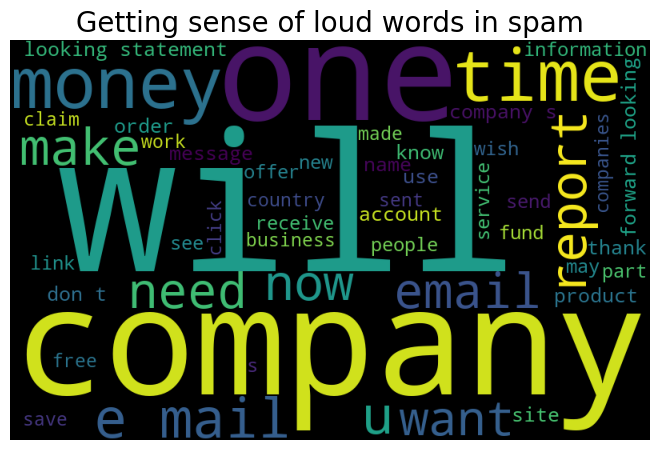

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
%matplotlib inline

spam = mails['message'][mails['label'] == 'spam']
spam_cloud = WordCloud(width=800,height=500,background_color='black',max_words=50).generate(' '.join(spam))

plt.imshow(spam_cloud)
plt.title("Getting sense of loud words in spam",fontsize=20);
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

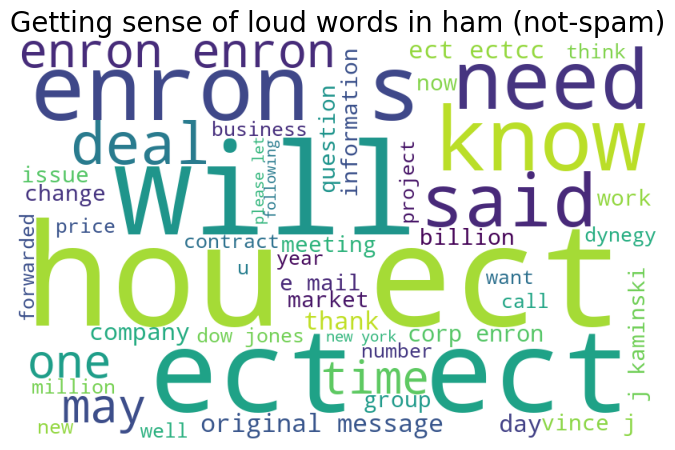

In [25]:
ham = mails['message'][mails['label'] == 'ham']

ham_cloud = WordCloud(width=800,height=500,background_color='white',max_words=50).generate(' '.join(ham))

plt.imshow(ham_cloud)
plt.title("Getting sense of loud words in ham (not-spam)",fontsize=20)

plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [27]:
#  Vectorizing Data: Encoding Text as integer i.e. numeric form to create feature vectors so that we can apply ML algos on it.

from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
vectors = vectorizer.fit_transform(mails['message'])
features = vectors

In [29]:
# split data to train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, mails['label'], test_size=0.15, random_state=111)

In [30]:
# use support vector classifier as ML model and test the accuracy
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clf = SVC(kernel='sigmoid', gamma=1.0)
clf.fit(X_train, y_train)
prediction = clf.predict(X_test)
score = accuracy_score(prediction, y_test)

In [31]:
score

0.9860055977608957

In [33]:
# save model for further
# https://medium.com/analytics-vidhya/save-and-load-your-scikit-learn-models-in-a-minute-21c91a961e9b
import joblib

model_file = 'clean_mail.pkl'
joblib.dump(clf, model_file)

['clean_mail.pkl']